In [1]:
import pandas as pd
import numpy as np
import seaborn
import math
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
file = pd.read_csv(r"C:\Users\natas\Downloads\telescope_data.csv")

In [3]:
df = pd.DataFrame(file)

#Explore data features
print(df)

print(f"Number of Attributes: {len(df.columns)} \nNumber of Samples: {len(df)}\n" ) 

#Check for null values
for i in df.isna().any():
    if i == True:
        print ("Null value(s) present in data.")
    else:
        print("No null values present.")
        
#Drop non-numerical data
non_numerical = []

for col in df:
    if df[col].dtypes != "float64":
        non_numerical.append(col)
        
df = df.drop(columns=non_numerical)
print(f"\nNon-numerical column(s) {non_numerical} dropped from data.")


      fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  fM3Trans  \
0     28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   -8.2027   
1     31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   -9.9574   
2    162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580  -45.2160   
3     23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   -7.1513   
4     75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   21.8393   
..        ...       ...     ...     ...     ...       ...       ...       ...   
196  107.5710   37.1208  3.2238  0.3823  0.3044  -52.7388  -60.3208   31.9757   
197   25.4911   15.4594  2.7153  0.4784  0.2490   14.4384  -15.4368    4.1073   
198   31.6082   10.4765  2.6699  0.4564  0.2321  -13.0004   14.2189    4.7111   
199  161.4795   83.0297  3.0887  0.2737  0.1515  -91.5838 -198.7053  -49.9263   
200  134.9790  111.4270  3.4087  0.2072  0.1087  -75.6075 -142.6500  -69.4388   

      fAlpha     fDist clas

# 1. Multivariate Mean Vector

In [4]:
#Compute the multivariate mean vector
mean_vec = []
for col in df.columns:
    mean_vec.append(round(df[col].mean(),4))
print(f"Multivariate mean vector: \n{mean_vec}")


Multivariate mean vector: 
[57.675, 24.0152, 2.8736, 0.3634, 0.2074, -3.2218, 13.1366, 1.7917, 31.5265, 197.8045]


# 2. Sample Covariance Matrix (Inner)

In [5]:
#Compute the sample covariance matrix as inner products between the columns of the centered data matrix

#First, compute the centered data matrix by subtracting the mean from each column entry
print(f'RAW DATA: \n\n{df.head()}')
print(f'\nRAW MEAN VECTOR: {mean_vec}')

centerdf = df.copy()

for col in range(len(centerdf.columns)):
    for row in range(len(centerdf)):
        centerdf[centerdf.columns[col]].iloc[row] -= mean_vec[col]
        
print(f"\n\nMEAN-CENTERED DATA: \n\n{centerdf.head()}")

#Confirm mean-centering accuracy (means should now equal 0)
mean_cent_vec = []
for col in centerdf.columns:
    mean_cent_vec.append(round(centerdf[col].mean(), 1))
print(f"\nMEAN-CENTERED MEAN VECTOR (all 0s expected): {mean_cent_vec}")

#Compute inner products between columns to generate sample covariance matrix
centermtrx = centerdf.to_numpy()
centertransp = centermtrx.transpose()
#Multiplying a matrix by its transpose yields the inner/dot product. This is then divided by n (number of rows). Display as dataframe.
inner_covmtrx = (np.matmul(centertransp, centermtrx))/(centermtrx.shape[0] - 1)

print(f'\n\nCOVARIANCE MATRIX AS INNER PRODUCTS: \n\n{pd.DataFrame(inner_covmtrx)}')


RAW DATA: 

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620  

RAW MEAN VECTOR: [57.675, 24.0152, 2.8736, 0.3634, 0.2074, -3.2218, 13.1366, 1.7917, 31.5265, 197.8045]


MEAN-CENTERED DATA: 

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0  -28.8783   -8.0131 -0.2287  0.0284 -0.0092   30.9222   8.8744   -9.9944   
1  -26.0714  -12.2917 -0.3551  0.1669  0.1699   29.4940  10.6872  -11.7491   
2  104.3770  112.0

# 3. Sample Covariance Matrix (Outer)

In [6]:
# Initialize blank canvas matrix
outer_covmtrx = np.zeros((centermtrx.shape[1], centermtrx.shape[1]))  # Dynamically initialize to number of attributes

# Compute sum of rank-one matrices obtained as outer product of each data point
for i in range(centermtrx.shape[0]):  
    observation = centermtrx[i, :]  
    observation_t = observation.reshape(-1, 1)  
    outer_covmtrx += np.dot(observation_t, observation_t.T)  # Compute the outer product using np.dot

# Normalize by the number of samples minus 1
outer_covmtrx /= (centermtrx.shape[0] - 1)

# Display as DataFrame
print(f'COVARIANCE MATRIX AS OUTER PRODUCTS: \n\n{pd.DataFrame(outer_covmtrx)}')

COVARIANCE MATRIX AS OUTER PRODUCTS: 

             0           1          2         3         4            5  \
0  1766.710603  731.278208  13.877761 -4.795976 -2.754310  -338.521963   
1   731.278208  511.310810   7.031488 -2.230835 -1.292486   254.802711   
2    13.877761    7.031488   0.226271 -0.067494 -0.038788     0.460739   
3    -4.795976   -2.230835  -0.067494  0.029483  0.017875     0.329190   
4    -2.754310   -1.292486  -0.038788  0.017875  0.011461     0.154446   
5  -338.521963  254.802711   0.460739  0.329190  0.154446  3899.838668   
6  -317.091670 -419.194118   1.608942 -0.884361 -0.605827  -263.597250   
7   134.197204   76.420843   0.648693 -0.393915 -0.209961    15.496390   
8   -42.699515   34.672026  -2.846388  1.319799  0.710753    10.170821   
9  1088.506735  456.444068  17.400684 -4.615745 -2.523787  -659.973549   

             6           7           8            9  
0  -317.091670  134.197204  -42.699515  1088.506735  
1  -419.194118   76.420843   34.672026

# 4. Correlation Between Attributes 1 & 2 

COSINE BETWEEN ATTRIBUTES 1 AND 2: [0.76940931]


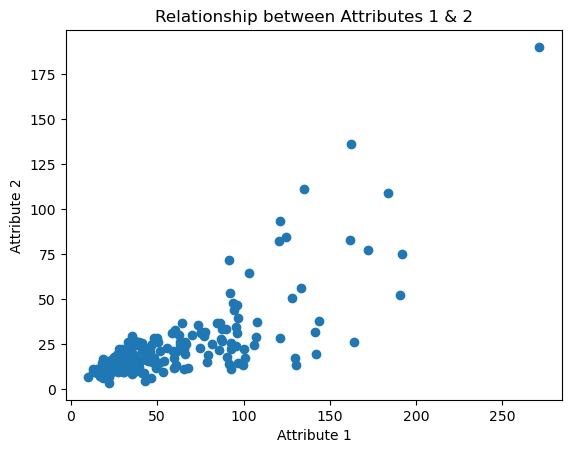

In [7]:
#Compute the correlation between Attributes 1 and 2 by computing the cosine of the angle between the centered attribute 
#vectors. Plot the scatter plot between these two attributes.

#Define a function to compute magnitude of a vector
def magnitude(vector): 
    return math.sqrt(sum(pow(x, 2) for x in vector))

#Define a function to compute the cosine between two vectors
def cos_bw_vecs(v1, v2):
    v1_t = np.reshape(v1, (1, v1.shape[0]))
    return (np.dot(v1_t,v2))/(magnitude(v1)*magnitude(v2))

A1 = centermtrx[:,0]
A2 = centermtrx[:,1]

print(f'COSINE BETWEEN ATTRIBUTES 1 AND 2: {cos_bw_vecs(A1, A2)}')

plt.scatter(df[df.columns[0]], df[df.columns[1]])
plt.title("Relationship between Attributes 1 & 2")
plt.xlabel("Attribute 1")
plt.ylabel("Attribute 2")
plt.show()


# 5. Attribute 1 Probability Density Function

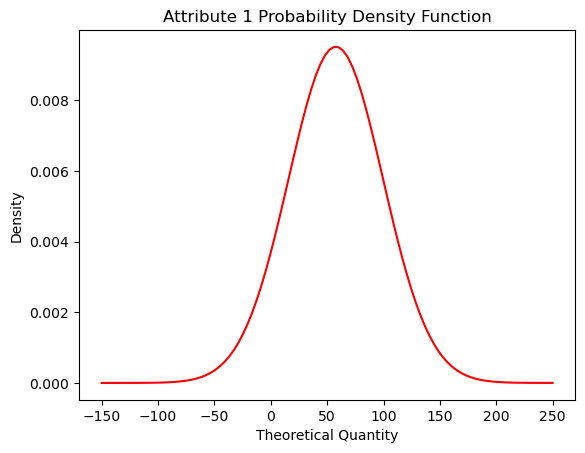

In [8]:
#Assuming that Attribute 1 is normally distributed, plot its probability density function.
A1_sample = df.to_numpy()[:,0]
#scipy.stats.probplot(A1_sample, dist = 'norm', fit = False, plot = plt)

#Define a function to plot the probability density function given mean and standard deviation (assuming normal distribution)
def f(x, mean, sd):
    return (1 / (sd * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * sd ** 2))

a1_mean = np.mean(A1_sample)
a1_sd = np.std(A1_sample)

x = np.linspace(-150, 250, 100)

plt.plot(x, f(x, a1_mean, a1_sd), color='red')
plt.title("Attribute 1 Probability Density Function")
plt.xlabel("Theoretical Quantity")
plt.ylabel("Density")

plt.show()


# 6. Pairplot Between Two Attributes

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


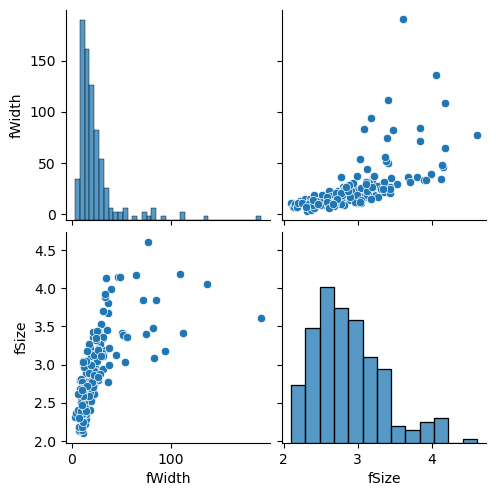

In [9]:
#Plot pairplot between any two different attributes.

newdf = df[['fWidth', 'fSize']].copy()

seaborn.pairplot(newdf)
plt.show()


# 7. Largest and Smallest Variance

In [10]:
#Initialize smallest and largest placeholders
smallest_var = ['str', float('inf')]
largest_var = ['str', float('-inf')]

#Iterate through data searching for variances to overwrite smallest and largest placeholders
for i in range(len(df.columns)):
    current_sd = df.var(axis=0)[i]
    if current_sd < smallest_var[1]:
        smallest_var[0] = df.columns[i]
        smallest_var[1] = current_sd
    if current_sd > largest_var[1]:
        largest_var[0] = df.columns[i]
        largest_var[1] = current_sd

print(f'The attribute with the smallest variance is {smallest_var[0]} with a value of {smallest_var[1]}')
print(f'The attribute with the largest variance is {largest_var[0]} with a value of {largest_var[1]}')


The attribute with the smallest variance is fConc1 with a value of 0.01146129476567164
The attribute with the largest variance is fDist with a value of 6361.467590825793


C:\Users\natas\AppData\Local\Temp\ipykernel_11732\2139499977.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_sd = df.var(axis=0)[i]


# 8. Largest and Smallest Covariance

In [11]:
# Calculate the covariance matrix
cov_matrix = df.cov()

# Initialize smallest and largest covariance placeholders
smallest_cov = ['str', 'str', float('inf')]
largest_cov = ['str', 'str', float('-inf')]

# Iterate through the covariance matrix to searching for covariances to overwrite smallest and largest placeholders
for i in range(len(cov_matrix.columns)):
    for j in range(i + 1, len(cov_matrix.columns)):
        cov_value = cov_matrix.iloc[i, j]
        if cov_value > largest_cov[2]:
            largest_cov = (cov_matrix.index[i], cov_matrix.columns[j], cov_value)
        if cov_value < smallest_cov[2]:
            smallest_cov = (cov_matrix.index[i], cov_matrix.columns[j], cov_value)

print(f"The attributes with the smallest covariance are {smallest_cov[0]} and {smallest_cov[1]} with value {smallest_cov[2]}")
print(f"The attributes with the largest covariance are {largest_cov[0]} and {largest_cov[1]} with value {largest_cov[2]}")


The attributes with the smallest covariance are fAsym and fDist with value -659.9735489916217
The attributes with the largest covariance are fLength and fDist with value 1088.506735404915


# 9. Plot Attribute 6 vs Attribute 8

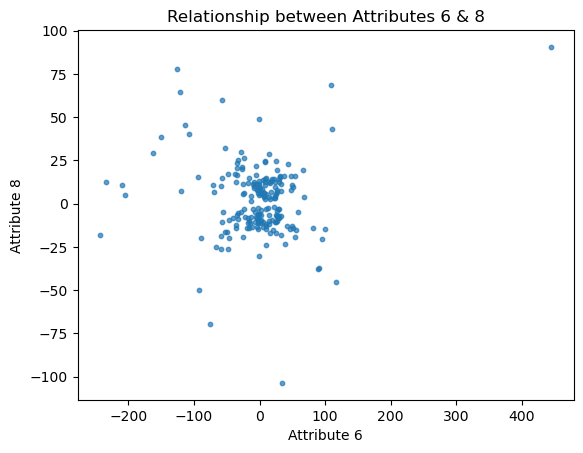

In [12]:
#Plot attribute 6 vs attribute 8. Mark each point as a circle

data_matrix = df.to_numpy()

plt.scatter(data_matrix[:,5], data_matrix[:,7], alpha = 0.7, s =10)
plt.title("Relationship between Attributes 6 & 8")
plt.xlabel("Attribute 6")
plt.ylabel("Attribute 8")
plt.show()
